# Cirrhosis Prediction Dataset
## 18 clinical features for predicting liver cirrhosis stage
#### Context
Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).<br>

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

#### Acknowledgements
The dataset can be found in appendix D of:<br>
Fleming, T.R. and Harrington, D.P. (1991) Counting Processes and Survival Analysis. Wiley Series in Probability and Mathematical Statistics: Applied Probability and Statistics, John Wiley and Sons Inc., New York.<br>
fedesoriano. (August 2021). Cirrhosis Prediction Dataset. Retrieved [Date Retrieved] from   <br> https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset.


#### Variables information
<ul>
    <li><strong>ID:</strong> unique identifier
  </li>
    <li><strong>N_Days:</strong> number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 </li>
    <li><strong>Status:</strong> status of the patient C (censored), CL (censored due to liver tx), or D (death) </li>
    <li><strong>Drug:</strong> type of drug D-penicillamine or placebo </li>
    <li><strong>Age:</strong> age in [days]</li>
    <li><strong>Sex:</strong> M (male) or F (female) </li>
    <li><strong>Ascites:</strong> presence of ascites N (No) or Y (Yes) </li>
    <li><strong>Hepatomegaly:</strong> presence of hepatomegaly N (No) or Y (Yes)</li>
    <li><strong>Spiders:</strong> presence of spiders N (No) or Y (Yes) </li>
    <li><strong>Edema:</strong> presence of edema N (no edema and no diuretic therapy for edema), S (edema present without
    diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)</li>
    <li><strong>Bilirubin:</strong>serum bilirubin in [mg/dl] </li>
       <li><strong>Cholesterol:</strong> serum cholesterol in [mg/dl] </li>
           <li><strong>Albumin:</strong> albumin in [gm/dl] </li>
           <li><strong>Copper:</strong> urine copper in [ug/day] </li>
           <li><strong>Alk_Phos:</strong> alkaline phosphatase in [U/liter]</li>
           <li><strong>SGOT:</strong> SGOT in [U/ml] </li>
           <li><strong>Triglycerides:</strong> triglicerides in [mg/dl] </li>
           <li> <strong>Platelets:</strong> platelets per cubic [ml/1000] </li>
           <li><strong>Prothrombin:</strong> prothrombin time in seconds [s] </li>
           <li><strong>Stage:</strong> histologic stage of disease (1, 2, 3, or 4) </li>
    
</ul>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.impute import SimpleImputer


In [3]:
path=r'C:\Users\ASUS\Documents\CirrosisData\cirrhosis.csv'

In [4]:
df=pd.read_csv(path)
display(df.head())

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

### Type of variables
####  discrete
<ul>
    <li>ID</li>
    <li>N_Days</li>
    <li>Age</li>

</ul>

####  continuous

<ul>
    <li>Bilirubin</li>
    <li>Cholesterol </li>
    <li>Albumin   </li>
    <li>Copper  </li>
    <li>Alk_Phos   </li>
    <li> SGOT    </li>
    <li>Tryglicerides  </li>
    <li>Platelets  </li>
    <li>Prothrombin    </li>
    <li>Stage  </li>

    
    
</ul>

####  nominal category

<ul>
    <li>Status  </li>
    <li>Drug   </li>
    <li>Sex  </li>
    <li>Ascites  </li>
    <li>Hepatomegaly  </li>
    <li>Spiders   </li>
    <li>Edema  </li>
    
</ul>
    

In [7]:
# Here there are null values,mean,median, standarD are not really values 
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
np.sum(df.isnull())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [9]:
df.Sex.value_counts()


F    374
M     44
Name: Sex, dtype: int64

In [10]:
df.groupby('Sex')['Sex'].count()

Sex
F    374
M     44
Name: Sex, dtype: int64

##### Work   null values with imputation method 

In [11]:
dfValues=df.copy()#Create copy  dataframe df for asigned to  dfValues
dfObject=df.copy()#Create copy dataframe df for asigned to dfObject
l=[i for i in df.columns if i not in ['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']]
dV=dfValues[l]
display(dV)#dataframe with unique  numeric values 

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,24472,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,14245,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,20819,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,21185,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


### Applying  imputation method

In [12]:
valores=dV.values
imputador=SimpleImputer(strategy='mean')
transformation=imputador.fit_transform(valores)
transformation=pd.DataFrame(transformation)
transformation.round(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,400.0,21464.0,14.5,261.00,2.60,156.00,1718.00,137.95,172.0,190.0,12.2,4.0
1,2.0,4500.0,20617.0,1.1,302.00,4.14,54.00,7394.80,113.52,88.0,221.0,10.6,3.0
2,3.0,1012.0,25594.0,1.4,176.00,3.48,210.00,516.00,96.10,55.0,151.0,12.0,4.0
3,4.0,1925.0,19994.0,1.8,244.00,2.54,64.00,6121.80,60.63,92.0,183.0,10.3,4.0
4,5.0,1504.0,13918.0,3.4,279.00,3.53,143.00,671.00,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414.0,681.0,24472.0,1.2,369.51,2.96,97.65,1982.66,122.56,124.7,174.0,10.9,3.0
414,415.0,1103.0,14245.0,0.9,369.51,3.83,97.65,1982.66,122.56,124.7,180.0,11.2,4.0
415,416.0,1055.0,20819.0,1.6,369.51,3.42,97.65,1982.66,122.56,124.7,143.0,9.9,3.0
416,417.0,691.0,21185.0,0.8,369.51,3.75,97.65,1982.66,122.56,124.7,269.0,10.4,3.0


In [13]:
# change name of columns 
transformation.columns=['ID','N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']

In [89]:
transformation.isnull().sum()

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [15]:
s=[i for i in df.columns if i in ['Drug','Ascites','Hepatomegaly','Spiders']]
dObject=dfObject[s]
display(dObject)


,Drug,Ascites,Hepatomegaly,Spiders
0,D-penicillamine,Y,Y,Y
1,D-penicillamine,N,Y,Y
2,D-penicillamine,N,N,N
3,D-penicillamine,N,Y,Y
4,Placebo,N,Y,Y
...,...,...,...,...
413,NaN,NaN,NaN,NaN
414,NaN,NaN,NaN,NaN
415,NaN,NaN,NaN,NaN
416,NaN,NaN,NaN,NaN


In [16]:
valoresTwo=dObject.values
imp=SimpleImputer(strategy='most_frequent')
transformationTwo=imp.fit_transform(valoresTwo)
transformationTwo=pd.DataFrame(transformationTwo)
transformationTwo


C:\Users\ASUS\Anaconda32018.12\lib\site-packages\sklearn\impute.py:341: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)
C:\Users\ASUS\Anaconda32018.12\lib\site-packages\sklearn\impute.py:341: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)
C:\Users\A

,0,1,2,3
0,D-penicillamine,Y,Y,Y
1,D-penicillamine,N,Y,Y
2,D-penicillamine,N,N,N
3,D-penicillamine,N,Y,Y
4,Placebo,N,Y,Y
...,...,...,...,...
413,D-penicillamine,N,Y,N
414,D-penicillamine,N,Y,N
415,D-penicillamine,N,Y,N
416,D-penicillamine,N,Y,N


In [17]:
transformationTwo.columns=['Drug','Ascites','Hepatomegaly','Spiders']
transformationTwo

,Drug,Ascites,Hepatomegaly,Spiders
0,D-penicillamine,Y,Y,Y
1,D-penicillamine,N,Y,Y
2,D-penicillamine,N,N,N
3,D-penicillamine,N,Y,Y
4,Placebo,N,Y,Y
...,...,...,...,...
413,D-penicillamine,N,Y,N
414,D-penicillamine,N,Y,N
415,D-penicillamine,N,Y,N
416,D-penicillamine,N,Y,N


In [18]:
for i in ['ID','N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']:
    transformationTwo[i]=transformation[i].values    

In [19]:
transformationTwo

,Drug,Ascites,Hepatomegaly,Spiders,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,Y,Y,Y,1.0,400.0,21464.0,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0
1,D-penicillamine,N,Y,Y,2.0,4500.0,20617.0,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0
2,D-penicillamine,N,N,N,3.0,1012.0,25594.0,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0
3,D-penicillamine,N,Y,Y,4.0,1925.0,19994.0,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0
4,Placebo,N,Y,Y,5.0,1504.0,13918.0,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,D-penicillamine,N,Y,N,414.0,681.0,24472.0,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0
414,D-penicillamine,N,Y,N,415.0,1103.0,14245.0,0.9,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0
415,D-penicillamine,N,Y,N,416.0,1055.0,20819.0,1.6,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0
416,D-penicillamine,N,Y,N,417.0,691.0,21185.0,0.8,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0


In [20]:
for i in  ['Status','Sex','Edema']:
    transformationTwo[i]=df[i].values 

In [21]:
transformationTwo

,Drug,Ascites,Hepatomegaly,Spiders,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Sex,Edema
0,D-penicillamine,Y,Y,Y,1.0,400.0,21464.0,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0,D,F,Y
1,D-penicillamine,N,Y,Y,2.0,4500.0,20617.0,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0,C,F,N
2,D-penicillamine,N,N,N,3.0,1012.0,25594.0,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0,D,M,S
3,D-penicillamine,N,Y,Y,4.0,1925.0,19994.0,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0,D,F,S
4,Placebo,N,Y,Y,5.0,1504.0,13918.0,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0,CL,F,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,D-penicillamine,N,Y,N,414.0,681.0,24472.0,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0,D,F,N
414,D-penicillamine,N,Y,N,415.0,1103.0,14245.0,0.9,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0,C,F,N
415,D-penicillamine,N,Y,N,416.0,1055.0,20819.0,1.6,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0,C,F,N
416,D-penicillamine,N,Y,N,417.0,691.0,21185.0,0.8,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0,C,F,N


In [22]:
# change order of column 
transformationTwo=transformationTwo[['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage']]

In [23]:
transformationTwo

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0
1,2.0,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0
2,3.0,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0
3,4.0,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0
4,5.0,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414.0,681.0,D,D-penicillamine,24472.0,F,N,Y,N,N,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0
414,415.0,1103.0,C,D-penicillamine,14245.0,F,N,Y,N,N,0.9,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0
415,416.0,1055.0,C,D-penicillamine,20819.0,F,N,Y,N,N,1.6,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0
416,417.0,691.0,C,D-penicillamine,21185.0,F,N,Y,N,N,0.8,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0


In [121]:
# check the null values
transformationTwo.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [24]:
transformationTwo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    float64
 1   N_Days         418 non-null    float64
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    float64
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [26]:
transformationTwo.head()



,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2.0,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3.0,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4.0,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5.0,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [34]:
transformationTwo['AgeAnio']=(transformationTwo['Age']/365).astype('int64')
transformationTwo

C:\Users\ASUS\Anaconda32018.12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,AgeAnio
0,1.0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,...,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0,58
1,2.0,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,...,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0,56
2,3.0,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,...,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0,70
3,4.0,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,...,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0,54
4,5.0,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,...,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414.0,681.0,D,D-penicillamine,24472.0,F,N,Y,N,N,...,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0,67
414,415.0,1103.0,C,D-penicillamine,14245.0,F,N,Y,N,N,...,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0,39
415,416.0,1055.0,C,D-penicillamine,20819.0,F,N,Y,N,N,...,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0,57
416,417.0,691.0,C,D-penicillamine,21185.0,F,N,Y,N,N,...,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0,58


In [48]:

transformationTwo.corr()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,AgeAnio
ID,1.000000,-0.354305,0.037136,-0.062154,0.020507,-0.128924,-0.063529,-0.227543,-0.007801,-0.021199,-0.075573,-0.191176,-0.033535,0.053245
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.114683,0.430829,-0.319775,0.131080,-0.198015,-0.126912,0.147495,-0.111042,-0.361992,-0.127958
Age,0.037136,-0.125934,1.000000,0.002362,-0.130578,-0.182350,0.053617,-0.041326,-0.131087,0.018278,-0.145948,0.113728,0.188105,0.999527
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.337809,-0.314177,0.405228,0.103842,0.392107,0.371490,-0.013347,0.312593,0.200272,0.000871
Cholesterol,0.020507,-0.114683,-0.130578,0.337809,1.000000,-0.054572,0.123024,0.140112,0.337282,0.276828,0.150683,-0.025016,0.008999,-0.129704
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.054572,1.000000,-0.225532,-0.086570,-0.187761,-0.080804,0.156384,-0.199386,-0.302362,-0.181863
Copper,-0.063529,-0.319775,0.053617,0.405228,0.123024,-0.225532,1.000000,0.187285,0.293547,0.272473,-0.053898,0.185349,0.232264,0.052426
Alk_Phos,-0.227543,0.131080,-0.041326,0.103842,0.140112,-0.086570,0.187285,1.000000,0.112217,0.168702,0.120688,0.076040,0.035733,-0.042397
SGOT,-0.007801,-0.198015,-0.131087,0.392107,0.337282,-0.187761,0.293547,0.112217,1.000000,0.119463,-0.100611,0.095427,0.142805,-0.131438
Tryglicerides,-0.021199,-0.126912,0.018278,0.371490,0.276828,-0.080804,0.272473,0.168702,0.119463,1.000000,0.080049,0.016290,0.099874,0.016693


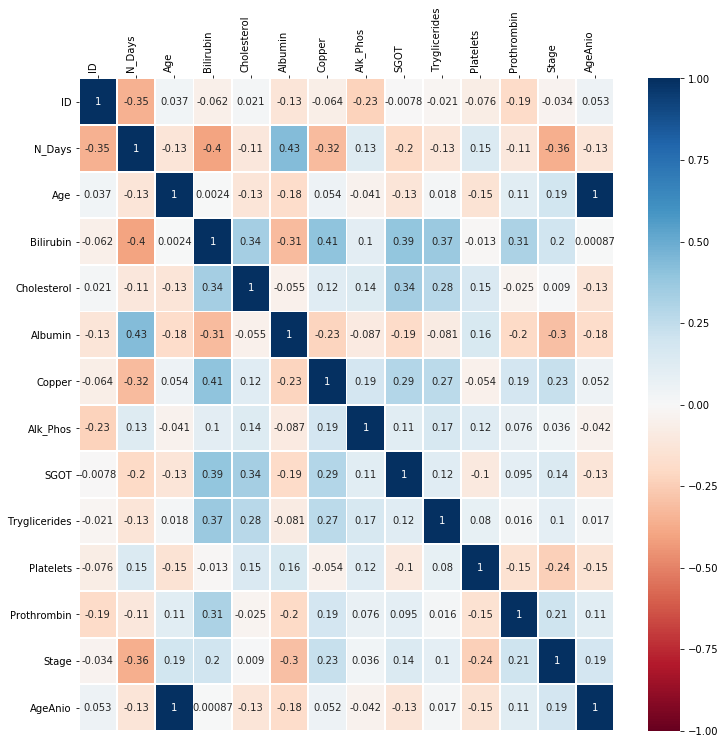

In [71]:
##correlation after null values
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(transformationTwo.corr(),cmap='RdBu',annot=True,ax=ax,linewidths=0.9,vmin=-1,vmax=1)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
         
plt.show()

In [73]:
transformationTwo.head(3)


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,AgeAnio
0,1.0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,58
1,2.0,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,56
2,3.0,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,70


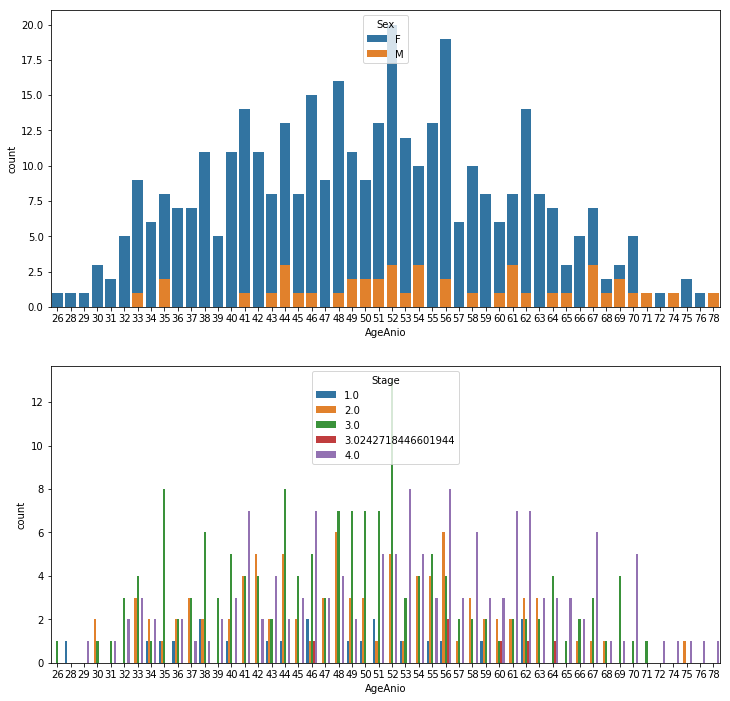

In [96]:
fig,ax=plt.subplots(2,1,figsize=(12,12))
sns.countplot(data=transformationTwo,x='AgeAnio',hue='Sex',ax=ax[0],dodge=False)
sns.countplot(data=transformationTwo,x='AgeAnio',hue='Stage',ax=ax[1],dodge=True)
plt.show()


In [92]:
transformationTwo.groupby('Stage')['Stage'].count()

Stage
1.000000     21
2.000000     92
3.000000    155
3.024272      6
4.000000    144
Name: Stage, dtype: int64

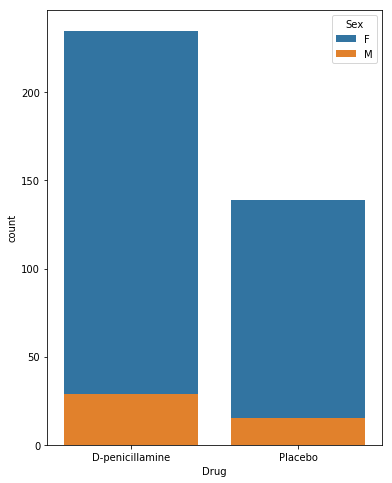

In [103]:
fig,axs=plt.subplots(figsize=(6,8))
sns.countplot(data=transformationTwo,x='Drug',hue='Sex',ax=axs,dodge=False)
plt.show()


In [174]:
def distributionPlot(x):
    fig,ax=plt.subplots(figsize=(8,5))
    sns.histplot(data=transformationTwo,x=x,ax=ax,kde=True)
    plt.show()        

C:\Users\ASUS\Anaconda32018.12\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ASUS\Anaconda32018.12\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ASUS\Anaconda32018.12\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


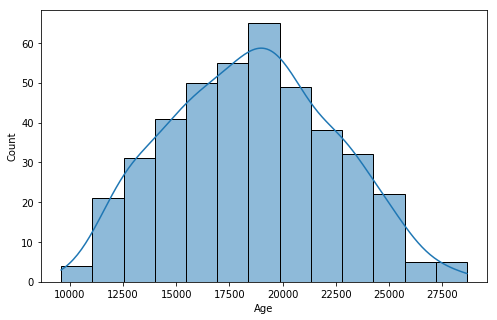

In [176]:
distributionPlot('Age')


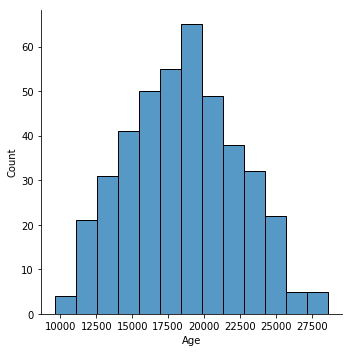

--------------------------------------------


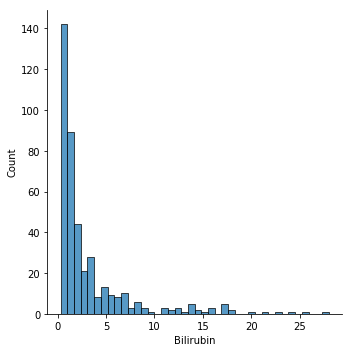

--------------------------------------------


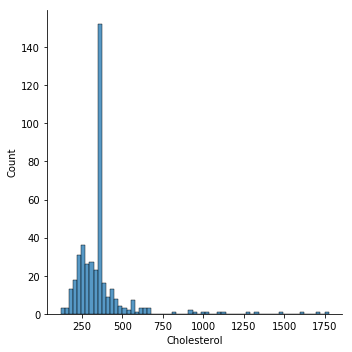

--------------------------------------------


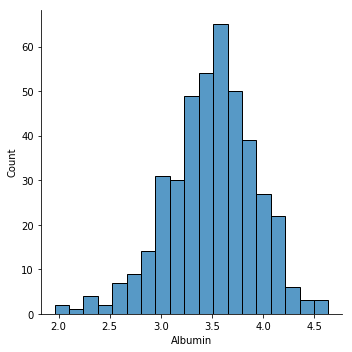

--------------------------------------------


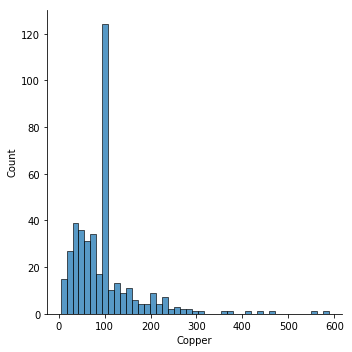

--------------------------------------------


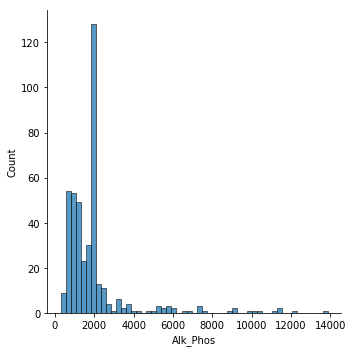

--------------------------------------------


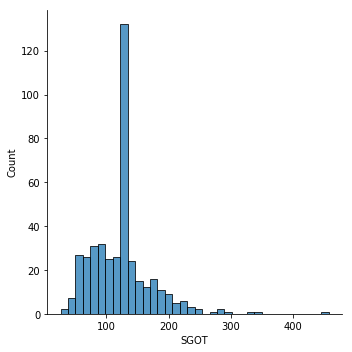

--------------------------------------------


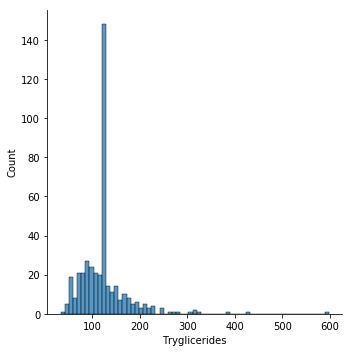

--------------------------------------------


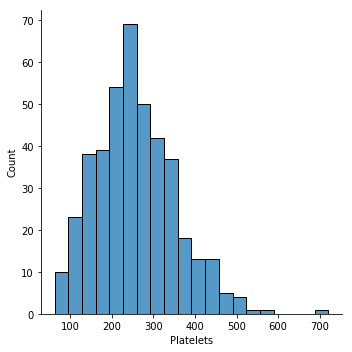

--------------------------------------------


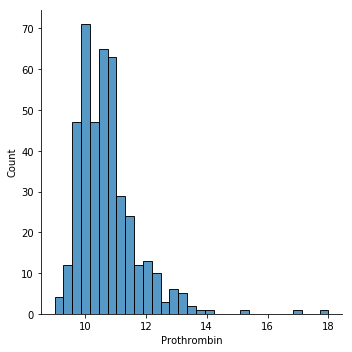

--------------------------------------------


In [186]:
l=['Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
for i in l:
    
    sns.displot(data=transformationTwo,x=i,kind="hist")
    plt.show()
    print('--------------------------------------------')